Data set: Baseball Data
-----------------------
A data set containing complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. Sabermetrics( Society for American Baseball Research) is the empirical analysis of baseball, especially baseball statistics that measure in-game activity. Sabermetricians collect and summarize the relevant data from this in-game activity to answer specific questions. 
Tables Used: 
------------
1. Teams.csv
2. Batting.csv
3. Salaries.csv

Baseball Data analysis(Questions to answers)
--------------------------------------------
1. Is there is relationship between salary of team of player and their run scored?
2. What are the performance metrics of the players?
3. Performance metrics can be created using existing ones?
4. Is there relationship between the performance metrics of the players and their run scored?    This information could be ued to predict the run score of the playes base on the   performance in the game. 

In [26]:
# Impot libraries
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [270]:
# Reading and uderstanding the data
teams = pd.read_csv("Teams.csv")
# teams
teams = teams[teams['yearID'] >= 1985]
# Select 15 attributes
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W','L', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

teams_setIndex = teams.set_index(['yearID', 'teamID'])
teams_setIndex


Rank    R   RA    G    W    L     H   BB   HBP    AB    SF  \
yearID teamID                                                               
1985   ATL        5  632  781  162   66   96  1359  553   NaN  5526   NaN   
       BAL        4  818  764  161   83   78  1451  604   NaN  5517   NaN   
       BOS        5  800  720  163   81   81  1615  562   NaN  5720   NaN   
       CAL        2  732  703  162   90   72  1364  648   NaN  5442   NaN   
       CHA        3  736  720  163   85   77  1386  471   NaN  5470   NaN   
       CHN        4  686  729  162   77   84  1397  562   NaN  5492   NaN   
       CIN        2  677  666  162   89   72  1385  576   NaN  5431   NaN   
       CLE        7  729  861  162   60  102  1465  492   NaN  5527   NaN   
       DET        3  729  688  161   84   77  1413  526   NaN  5575   NaN   
       HOU        3  706  691  162   83   79  1457  477   NaN  5582   NaN   
       KCA        1  687  639  162   91   71  1384  473   NaN  5500   NaN   
       LAN        1  682  579  162   95   67  1434  539   NaN  5502   NaN   
       MIN        4  705  782  162   77   85  1453  502   NaN  5509   NaN   
       ML4        6  690  802  161   71   90  1467  462   NaN  5568   NaN   
       MON        3  633  636  161   84   77  1342  492   NaN  5429   NaN   
       NYA        2  839  660  161   97   64  1458  620   NaN  5458   NaN   
       NYN        2  695  568  162   98   64  1425  546   NaN  5549   NaN   
       OAK        4  757  787  162   77   85  1475  508   NaN  5581   NaN   
       PHI        5  667  673  162   75   87  1343  527   NaN  5477   NaN   
       PIT        6  568  708  161   57  104  1340  514   NaN  5436   NaN   
       SDN        3  650  622  162   83   79  1405  513   NaN  5507   NaN   
       SEA        6  719  818  162   74   88  1410  564   NaN  5521   NaN   
       SFN        6  556  674  162   62  100  1263  488   NaN  5420   NaN   
       SLN        1  747  572  162  101   61  1446  586   NaN  5467   NaN   
       TEX        7  617  785  161   62   99  1359  530   NaN  5361   NaN   
       TOR        1  759  588  161   99   62  1482  503   NaN  5508   NaN   
1986   ATL        6  615  719  161   72   89  1348  538   NaN  5384   NaN   
       BAL        7  708  760  162   73   89  1425  563   NaN  5524   NaN   
       BOS        1  794  696  161   95   66  1488  595   NaN  5498   NaN   
       CAL        1  786  684  162   92   70  1387  671   NaN  5433   NaN   
...             ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   ...   
2016   ARI        4  752  890  162   69   93  1479  463  50.0  5665  38.0   
       ATL        5  649  779  161   68   93  1404  502  59.0  5514  52.0   
       BAL        2  744  715  162   89   73  1413  468  44.0  5524  36.0   
       BOS        1  878  694  162   93   69  1598  558  43.0  5670  40.0   
       CHA        4  686  715  162   78   84  1428  455  53.0  5550  44.0   
       CHN        1  808  556  162  103   58  1409  656  96.0  5503  37.0   
       CIN        5  716  854  162   68   94  1403  452  52.0  5487  44.0   
       CLE        1  777  676  161   94   67  1435  531  49.0  5484  60.0   
       COL        3  845  860  162   75   87  1544  494  40.0  5614  34.0   
       DET        2  750  721  161   86   75  1476  493  53.0  5526  38.0   
       HOU        3  724  701  162   84   78  1367  554  47.0  5545  31.0   
       KCA        3  675  712  162   81   81  1450  382  45.0  5552  34.0   
       LAA        4  717  727  162   74   88  1410  471  51.0  5431  49.0   
       LAN        1  725  638  162   91   71  1376  525  58.0  5518  32.0   
       MIA        3  655  682  161   79   82  1460  447  54.0  5547  38.0   
       MIL        4  671  733  162   73   89  1299  599  37.0  5330  39.0   
       MIN        5  722  889  162   59  103  1409  513  44.0  5618  43.0   
       NYA        4  680  702  162   84   78  1378  475  42.0  5458  49.0   
       NYN        2  671  617  162   87   75  1342  517  62.0  5459  41.0   
       OAK 

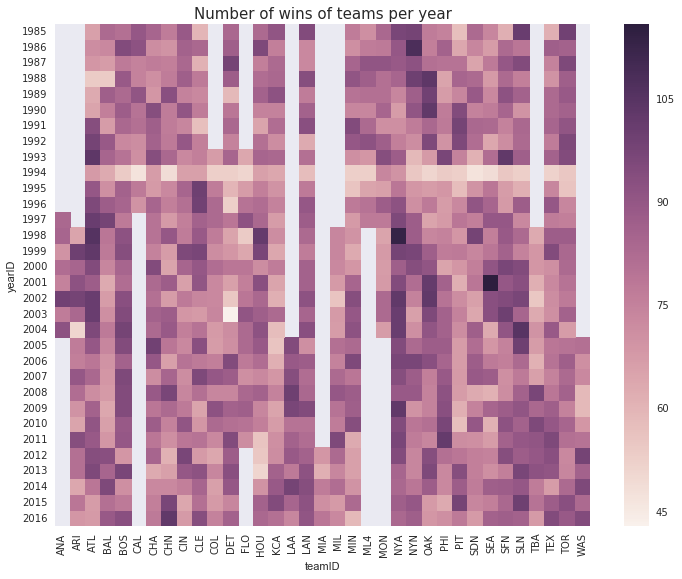

In [275]:
# Plot searborn
teams_plot = teams[['yearID', 'teamID', 'W']]
# teams_plot
teams_plot = teams_plot.pivot("yearID", "teamID", "W")

ax = sns.heatmap(teams_plot)

ax.set_title('Number of wins of teams per year', fontsize=15)


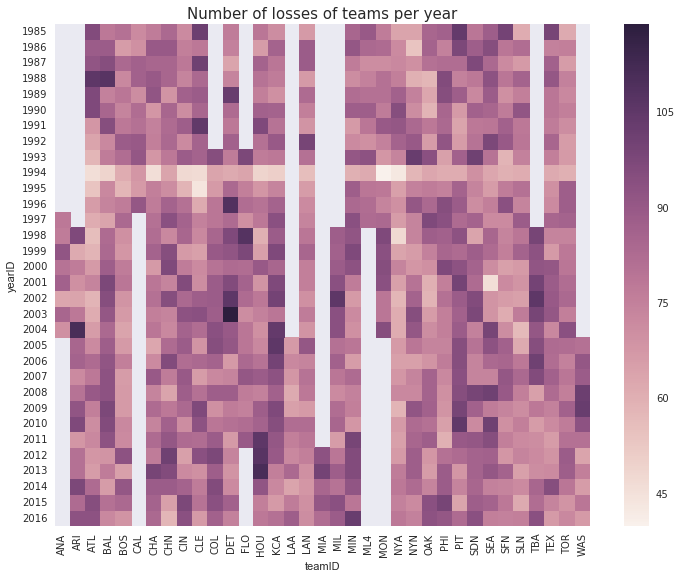

In [277]:
teams_plot = teams[['yearID', 'teamID', 'L']]
# teams_plot
teams_plot = teams_plot.pivot("yearID", "teamID", "L")
ax = sns.heatmap(teams_plot)

ax.set_title('Number of losses of teams per year', fontsize=15)


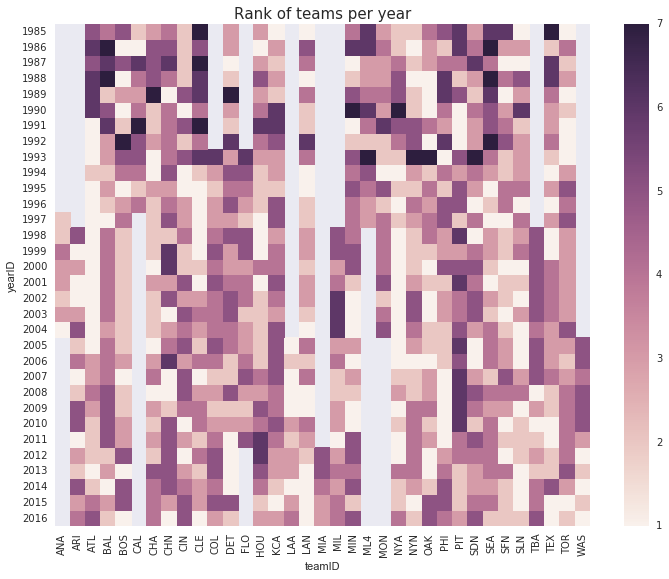

In [267]:
teams_plot = teams[['yearID', 'teamID', 'Rank']]
teams_plot
teams_plot = teams_plot.pivot("yearID", "teamID", "Rank")
teams_plot
ax = sns.heatmap(teams_plot)
ax.set_title('Rank of teams per year', fontsize=15)


In [264]:
# Read the salary of baseball players
salaries = pd.read_csv("Salaries.csv")
# salaries = salaries.set_index(['yearID', 'teamID'])
# salaries.sort_values('salary', axis=0, ascending=True)
salaries
salary_plot = salaries[['yearID', 'playerID', 'salary']]
# salary_plot

# # salary_plot = salary_plot.drop_duplicates()
# salary_plot.drop_duplicates(["yearID","teamID","salary"])
# salary_plot = salary_plot.pivot(index="yearID", columns="playerID", values="salary")
# # salary_plot

# ax = sns.heatmap(salary_plot)

# # salary_plot=salary_plot[salary_plot.duplicated()]
# # salary_plot



In [203]:
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()
salaries_by_yearID_teamID

# salaries_by_yearID_teamID[2001, 'OAK']

yearID  teamID
1985    ATL        14807000
        BAL        11560712
        BOS        10897560
        CAL        14427894
        CHA         9846178
        CHN        12702917
        CIN         8359917
        CLE         6551666
        DET        10348143
        HOU         9993051
        KCA         9321179
        LAN        10967917
        MIN         5764821
        ML4        11284107
        MON         9470166
        NYA        14238204
        NYN        10834762
        OAK         9058606
        PHI        10124966
        PIT         9227500
        SDN        11036583
        SEA         4613000
        SFN         8221714
        SLN        11817083
        TEX         7676500
        TOR         8812550
1986    ATL        17102786
        BAL        13001258
        BOS        14402239
        CAL        14427258
                    ...    
2016    ARI        87439063
        ATL        68498291
        BAL       161863456
        BOS       188545761
     

In [182]:
# teams = teams.join(salaries_by_yearID_teamID ,lsuffix='_teams', rsuffix='_salaries_by_yearID_teamID')
teams_setIndex= teams_setIndex.join(salaries_by_yearID_teamID, lsuffix='_teams' )
teams_setIndex
# teams['salary'][2005, "OAK"]
# plt.scatter(teams['salary'][2001], teams['W'][2001])
# plt.show()

Rank    R   RA    G    W     H   BB   HBP    AB    SF   HR  \
yearID teamID                                                               
1985   ATL        5  632  781  162   66  1359  553   NaN  5526   NaN  126   
       BAL        4  818  764  161   83  1451  604   NaN  5517   NaN  214   
       BOS        5  800  720  163   81  1615  562   NaN  5720   NaN  162   
       CAL        2  732  703  162   90  1364  648   NaN  5442   NaN  153   
       CHA        3  736  720  163   85  1386  471   NaN  5470   NaN  146   
       CHN        4  686  729  162   77  1397  562   NaN  5492   NaN  150   
       CIN        2  677  666  162   89  1385  576   NaN  5431   NaN  114   
       CLE        7  729  861  162   60  1465  492   NaN  5527   NaN  116   
       DET        3  729  688  161   84  1413  526   NaN  5575   NaN  202   
       HOU        3  706  691  162   83  1457  477   NaN  5582   NaN  121   
       KCA        1  687  639  162   91  1384  473   NaN  5500   NaN  154   
       LAN        1  682  579  162   95  1434  539   NaN  5502   NaN  129   
       MIN        4  705  782  162   77  1453  502   NaN  5509   NaN  141   
       ML4        6  690  802  161   71  1467  462   NaN  5568   NaN  101   
       MON        3  633  636  161   84  1342  492   NaN  5429   NaN  118   
       NYA        2  839  660  161   97  1458  620   NaN  5458   NaN  176   
       NYN        2  695  568  162   98  1425  546   NaN  5549   NaN  134   
       OAK        4  757  787  162   77  1475  508   NaN  5581   NaN  155   
       PHI        5  667  673  162   75  1343  527   NaN  5477   NaN  141   
       PIT        6  568  708  161   57  1340  514   NaN  5436   NaN   80   
       SDN        3  650  622  162   83  1405  513   NaN  5507   NaN  109   
       SEA        6  719  818  162   74  1410  564   NaN  5521   NaN  171   
       SFN        6  556  674  162   62  1263  488   NaN  5420   NaN  115   
       SLN        1  747  572  162  101  1446  586   NaN  5467   NaN   87   
       TEX        7  617  785  161   62  1359  530   NaN  5361   NaN  129   
       TOR        1  759  588  161   99  1482  503   NaN  5508   NaN  158   
1986   ATL        6  615  719  161   72  1348  538   NaN  5384   NaN  138   
       BAL        7  708  760  162   73  1425  563   NaN  5524   NaN  169   
       BOS        1  794  696  161   95  1488  595   NaN  5498   NaN  144   
       CAL        1  786  684  162   92  1387  671   NaN  5433   NaN  167   
...             ...  ...  ...  ...  ...   ...  ...   ...   ...   ...  ...   
2016   ARI        4  752  890  162   69  1479  463  50.0  5665  38.0  190   
       ATL        5  649  779  161   68  1404  502  59.0  5514  52.0  122   
       BAL        2  744  715  162   89  1413  468  44.0  5524  36.0  253   
       BOS        1  878  694  162   93  1598  558  43.0  5670  40.0  208   
       CHA        4  686  715  162   78  1428  455  53.0  5550  44.0  168   
       CHN        1  808  556  162  103  1409  656  96.0  5503  37.0  199   
       CIN        5  716  854  162   68  1403  452  52.0  5487  44.0  164   
       CLE        1  777  676  161   94  1435  531  49.0  5484  60.0  185   
       COL        3  845  860  162   75  1544  494  40.0  5614  34.0  204   
       DET        2  750  721  161   86  1476  493  53.0  5526  38.0  211   
       HOU        3  724  701  162   84  1367  554  47.0  5545  31.0  198   
       KCA        3  675  712  162   81  1450  382  45.0  5552  34.0  147   
       LAA        4  717  727  162   74  1410  471  51.0  5431  49.0  156   
       LAN        1  725  638  162   91  1376  525  58.0  5518  32.0  189   
       MIA        3  655  682  161   79  1460  447  54.0  5547  38.0  128   
       MIL        4  671  733  162   73  1299  599  37.0  5330  39.0  194   
       MIN        5  722  889  162   59  1409  513  44.0  5618  43.0  200   
       NYA        4  680  702  162   84  1378  475  42.0  5458  49.0  183   
       NYN        2  671  617  162   87  1342  517  62.0  5459  41.0  218   
       OAK 

In [183]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_Runs(teams_setIndex, year):    
    teams_year =teams_setIndex.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['R'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['R'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter)
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
#     Increase the figure size to avoid ovelapping
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Total run score' , fontsize=20)
    ax.set_title('Salaries - Run score: '+ str(year), fontsize=20, fontweight='bold')
    plt.show()

Plot to see:  higher the salary higher the run scored
-------------------------------------------------------------    

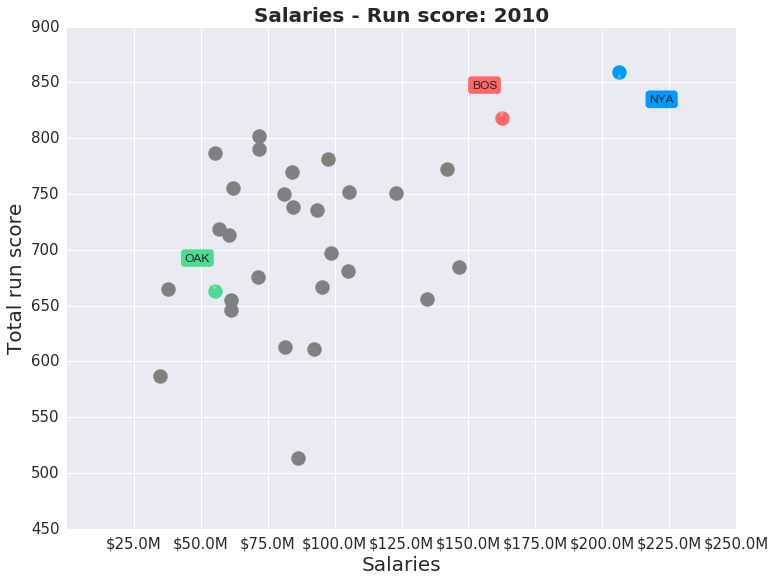

In [188]:
plot_spending_Runs(teams_setIndex,2010)

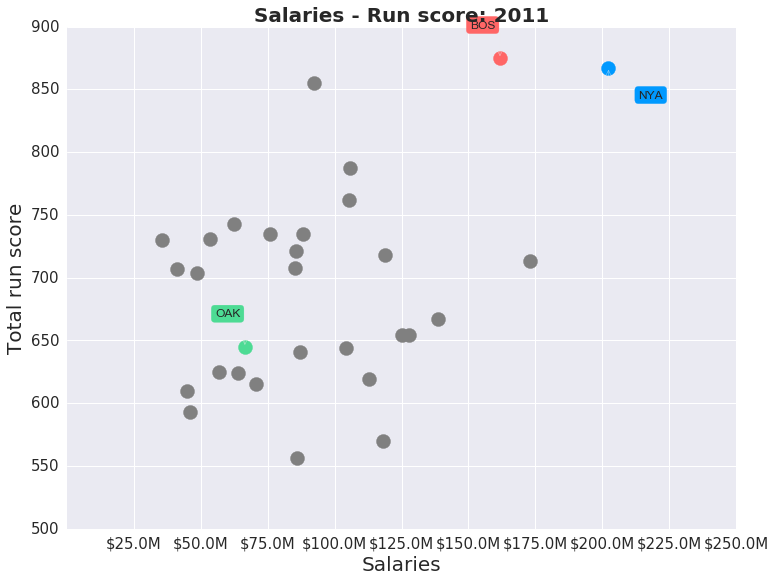

In [186]:
plot_spending_Runs(teams_setIndex,2011)

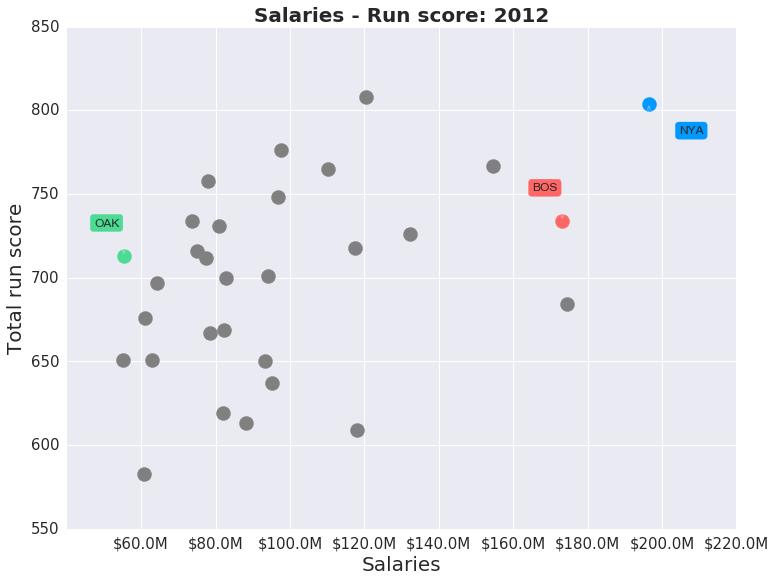

In [187]:
plot_spending_Runs(teams_setIndex,2012)

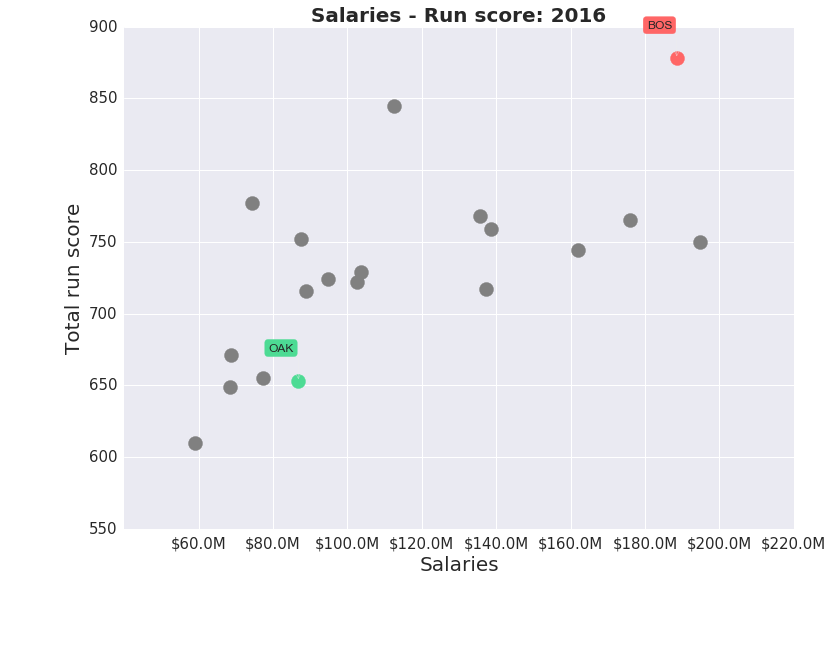

In [189]:
plot_spending_Runs(teams_setIndex,2016)

Read Batting table
------------------
Three new perofrmance metrics is created using exisiting on
1. Batting Average: measures the performance of batters in baseball<br /> 
   The Batting average is calculated using the formaula.<br />
   Batting Average = Number of hits/At bats

2. Ob base percentage: is a measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.<br />
  On-base percentage is calculated using this formula:<br />

  OBP = H+BB+HBP/AB+BB+HBP+SF <br />
  where<br />
  H = Hits<br/>
  BB = Bases on Balls (Walks)<br />
  HBP = Hit By Pitch<br />
  AB = At bats<br />
  SF = Sacrifice Flies<br />
  
3. Slugging Percentage: popular measure of the power of a hitter.<br />
    Slugging percentage is calculated using this formula:<br />
    
    SLP = (1*B)+(2*2B)+(3*3B)+(4*HR)/AB. <br />
    where<br />
    1B, 2B, 3B, and HR are the number of singles, doubles, triples, and home runs,
    
 


In [83]:
# Read the batting data
batting = pd.read_csv("Batting.csv")
batting = batting[batting['yearID'] >= 2000]
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,Batting_avg,On_base_percentage,Slugging_percentage
79250,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,21,38.0,1.0,2.0,2.0,1.0,2.0,0.274418605,0.343096234,33.05581395
79251,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,14,51.0,2.0,1.0,0.0,1.0,2.0,0.21656051,0.283236994,17.15286624
79252,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0.4,0.4,2
79253,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,100,116.0,9.0,1.0,0.0,3.0,12.0,0.315972222,0.416176471,114.1736111
79254,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.5,0
79255,adamste01,2000,1,LAN,NL,66,2,0,0,0,...,0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0
79256,agbaybe01,2000,1,NYN,NL,119,350,59,101,19,...,54,68.0,2.0,7.0,0.0,3.0,6.0,0.288571429,0.391304348,41.17142857
79257,aguilri01,2000,1,CHN,NL,54,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,#DIV/0!
79258,alcanis01,2000,1,BOS,AL,21,45,9,13,1,...,3,7.0,0.0,0.0,0.0,0.0,0.0,0.288888889,0.333333333,2.355555556
79259,aldresc01,2000,1,PHI,NL,23,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,#DIV/0!,#DIV/0!,#DIV/0!


Cleaning the data
-----------------
1. Select atrributes into consideration for analysis.
2. Drop all missing data

In [100]:
# drop Nan
import numpy as np
from sklearn import preprocessing
batting = batting.dropna(how = "any")
batting = batting.replace('#DIV/0!',0)
batting = batting[['playerID','yearID' ,'teamID', 'R', 'Batting_avg','On_base_percentage', 'Slugging_percentage' ]]
batting = batting.replace(0, np.nan)
batting.dropna(how = 'any')
# Change datatypes 
batting[['Batting_avg','On_base_percentage', 'Slugging_percentage']] = batting[['Batting_avg','On_base_percentage', 'Slugging_percentage']].astype(float)
# df_norm = (batting - batting.mean()) / (batting.max() - batting.min())
# batting.max()
# Normalize data

batting

,playerID,yearID,teamID,R,Batting_avg,On_base_percentage,Slugging_percentage
79250,abbotje01,2000,CHA,31.0,0.274419,0.343096,33.055814
79251,abbotku01,2000,NYN,22.0,0.216561,0.283237,17.152866
79252,abbotpa01,2000,SEA,1.0,0.400000,0.400000,2.000000
79253,abreubo01,2000,PHI,103.0,0.315972,0.416176,114.173611
79256,agbaybe01,2000,NYN,59.0,0.288571,0.391304,41.171429
79258,alcanis01,2000,BOS,9.0,0.288889,0.333333,2.355556
79260,alexama02,2000,BOS,30.0,0.211340,0.260870,17.082474
79262,alfoned01,2000,NYN,109.0,0.323529,0.424615,86.183824
79263,alicelu01,2000,TEX,85.0,0.294444,0.364975,74.044444
79264,allench01,2000,MIN,2.0,0.300000,0.345455,6.000000


Statistical description of batting data
---------------------------------------

In [86]:
batting.describe()

,yearID,R,Batting_avg,On_base_percentage,Slugging_percentage
count,23565.000000,12936.000000,17292.000000,17360.000000,17292.000000
mean,2008.136007,29.121985,0.198327,0.253243,19.752949
std,4.925593,30.435221,0.134486,0.156374,26.360737
min,2000.000000,1.000000,0.000000,0.000000,0.000000
25%,2004.000000,NaN,NaN,NaN,NaN
50%,2008.000000,NaN,NaN,NaN,NaN
75%,2012.000000,NaN,NaN,NaN,NaN
max,2016.000000,152.000000,1.000000,1.000000,145.150327


Distribution of each attribute by looking at box plot
-----------------------------------------------------

In [111]:
# Normalize data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
batting_plot = batting[['R', 'Batting_avg','On_base_percentage', 'Slugging_percentage']]
np_scaled = min_max_scaler.fit_transform(batting_plot)
df_normalized = pd.DataFrame(np_scaled, columns=['R', 'Batting_avg','On_base_percentage', 'Slugging_percentage'])
df_normalized

,R,Batting_avg,On_base_percentage,Slugging_percentage
0,0.198675,0.257545,0.325342,0.227542
1,0.139073,0.198341,0.263865,0.117952
2,0.000000,0.386047,0.383784,0.013532
3,0.675497,0.300065,0.400397,0.786535
4,0.384106,0.272027,0.374853,0.283467
5,0.052980,0.272351,0.315315,0.015982
6,0.192053,0.192999,0.240893,0.117467
7,0.715232,0.307798,0.409064,0.593654
8,0.556291,0.278036,0.347813,0.510000
9,0.006623,0.283721,0.327764,0.041096


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x1334e25d0>,
 'caps': [<matplotlib.lines.Line2D at 0x122f6d210>,
 'fliers': [<matplotlib.lines.Line2D at 0x13251aa50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13320ed90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1334e20d0>,
  <matplotlib.lines.Line2D at 0x134c88590>]}

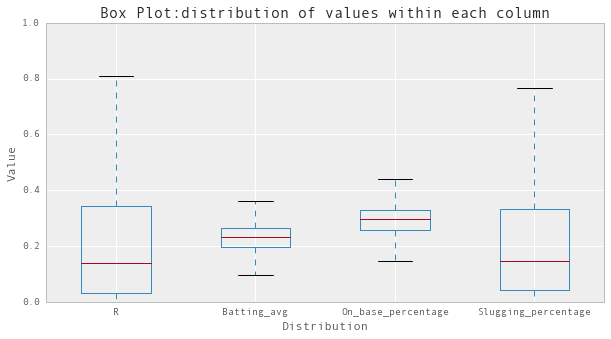

In [313]:
pd.options.display.mpl_style = 'default'

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Box Plot:distribution of values within each column', fontsize = 15)
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')
df_normalized.boxplot(widths = 0.5)

In [106]:
# calculating groupby for each variable
Batting_avg_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['Batting_avg'].sum()
Run_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['R'].sum()
On_base_percentage_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['On_base_percentage'].sum()
Slugging_percentage_by_yearID_teamID = batting.groupby(['yearID', 'teamID'])['Slugging_percentage'].sum()

Slugging_percentage_by_yearID_teamID


yearID  teamID
2000    ANA       722.221816
        ARI       699.426047
        ATL       627.834042
        BAL       684.395174
        BOS       730.746532
        CHA       751.203412
        CHN       610.137157
        CIN       716.854187
        CLE       712.618307
        COL       802.850996
        DET       739.560993
        FLO       635.311585
        HOU       689.453481
        KCA       644.402226
        LAN       613.099597
        MIL       669.665150
        MIN       796.585431
        MON       727.761122
        NYA       666.406889
        NYN       621.678986
        OAK       634.016944
        PHI       728.315440
        PIT       735.684742
        SDN       663.713737
        SEA       680.825160
        SFN       744.092004
        SLN       596.455436
        TBA       576.717678
        TEX       767.381327
        TOR       721.281610
                     ...    
2016    ARI       741.341302
        ATL       670.861412
        BAL       549.349488

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


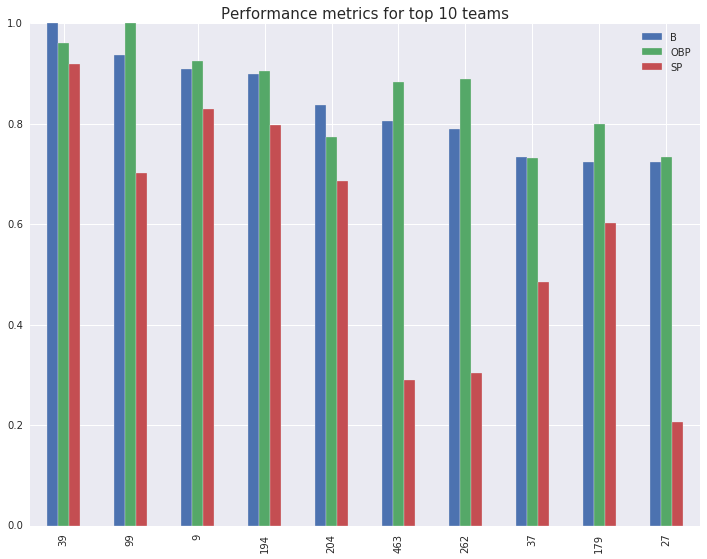

In [305]:
# Joining different data frames into one

df1 = pd.DataFrame(data=Batting_avg_by_yearID_teamID.values, columns=['Batting_avg_by_yearID_teamID'])
df2 = pd.DataFrame(data=On_base_percentage_by_yearID_teamID.values, columns=['On_base_percentage_by_yearID_teamID'])
df3 = pd.DataFrame(data=Slugging_percentage_by_yearID_teamID.values, columns=['Slugging_percentage_by_yearID_teamID'])

df = pd.merge(df1, df2, left_index=True, right_index=True)
# merge all three datafrmanes
df_final = pd.merge(df, df3, left_index=True, right_index=True)
df_final_Normalize = min_max_scaler.fit_transform(df_final)
df_final_Normalize_DF = pd.DataFrame(df_final_Normalize, columns=['B', 'OBP', 'SP'])
# plot 10 records of data
#  B= Batting_avg_by_yearID_teamID
# OBP = On_base_percentage_by_yearID_teamID
# SP = Slugging_percentage_by_yearID_teamID
df_final_Normalize_DF = df_final_Normalize_DF.sort(columns=['B', 'OBP', 'SP'], 
                                                   axis=0, ascending=False, kind='quicksort')
# Top 10 team data about three perofrmace metrics
df_final_Normalize_DF_top=df_final_Normalize_DF[0:10]
# df_final_Normalize_DF
df_final_Normalize_DF_top.plot(kind = 'bar')
plt.title("Performance metrics for top 10 teams", fontsize = 15)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133220350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13329b7d0>]], dtype=object)

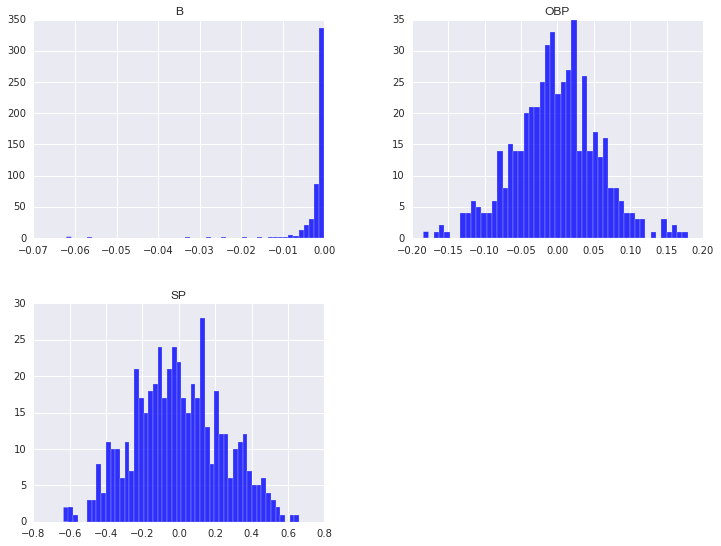

In [302]:
# plots the histograms of the columns on multiple subplots
df_final_Normalize_DF.diff().hist(color='B', alpha=0.8, bins=50)

Caculation of correlation between different variables
----------------------------------------------------

In [295]:
# Correlations
df1 = pd.DataFrame(data=Batting_avg_by_yearID_teamID.values, columns=['Batting_avg'])
df2 = pd.DataFrame(data=On_base_percentage_by_yearID_teamID.values, columns=['On_base_percentage'])
df3 = pd.DataFrame(data=Slugging_percentage_by_yearID_teamID.values, columns=['Slugging_percentage'])
df4 = pd.DataFrame(data=Run_by_yearID_teamID.values, columns=['Run_Score'])
df1_df2 = pd.merge(df1, df2, left_index=True, right_index=True)
# merge all three datafrmanes
df1_df2_df3 = pd.merge(df1_df2, df3, left_index=True, right_index=True)
df1_df2_df3_df4 = pd.merge(df1_df2_df3, df4, left_index=True, right_index=True)
# df1_df2_df3_df4
df1_df2_df3_df4_Normalize = min_max_scaler.fit_transform(df1_df2_df3_df4)
df1_df2_df3_df4_Normalize_DF = pd.DataFrame(df1_df2_df3_df4_Normalize, columns=['Batting_avg', 'On_base_percentage', 'Slugging_percentage','Run_Score' ])
df1_df2_df3_df4_Normalize_DF

,Batting_avg,On_base_percentage,Slugging_percentage,Run_Score
0,0.216945,0.206647,0.607967,0.755889
1,0.714672,0.747410,0.545077,0.614561
2,0.485645,0.535890,0.347567,0.633833
3,0.550928,0.539199,0.503610,0.616702
4,0.515312,0.556696,0.631485,0.608137
5,0.270444,0.262580,0.687922,1.000000
6,0.643557,0.730703,0.298744,0.539615
7,0.697055,0.733542,0.593159,0.665953
8,0.381523,0.430103,0.581472,0.948608
9,0.909691,0.924652,0.830409,0.976445


   [1]: http://url

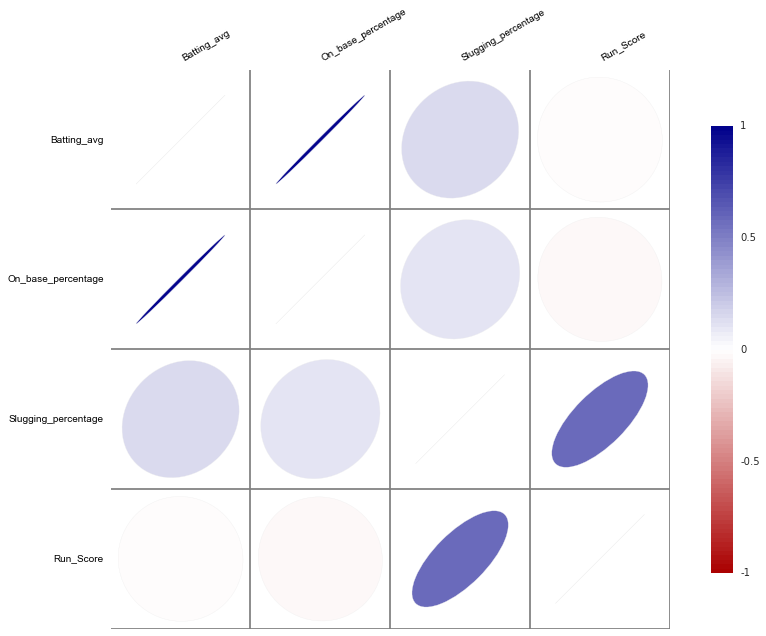

In [299]:
# Plotting correlation matrix plot between variables
from biokit.viz import corrplot
df1_df2_df3_df4 = df1_df2_df3_df4.corr()
c = corrplot.Corrplot(df1_df2_df3_df4)
c.plot()



Limitations of Analysis
-----------------------
1. The table teams is filled with missing values which has been haddle by ommiting those missing vlaues to avoid incorrect result in the analysis. We have selected most relevant attributes of the table for furthure analysis.
2. Miissing data in slaries is also handle by dropping all NAN entries.
3. Batting table missing data is aso handled by ommiting all those NAN entries.

Conclusion
----------
1. In table teams I have started with several variables to analyze with. Because number wins, number of losses, Run scored, Atbats, Hits  y batter, doubles, triples play a major role performance evaluation of players and team.

2. Its been observed Higher the number of the salary, higher the run scored by team.
3. There is a positive correation between run score and Batting average by the player.
3. There is a positive correation between run score and base percentage by the player.
5. There is positive  and strong correlation between run score and Slugging percentage by the player. But it does not imply that one causes another although there is possible relationship that higher the slugging percentage of the player more chances to score run by the players.

Reference links
---------------
1. <https://en.wikipedia.org/wiki/Sabermetrics>
2. <http://adilmoujahid.com/posts/2014/07/baseball-analytics/>
3. <http://www.seanlahman.com/baseball-archive/statistics/>
4. <https://en.wikipedia.org/wiki/Batting_average>
5. <https://en.wikipedia.org/wiki/On-base_percentage>
6. <https://en.wikipedia.org/wiki/Slugging_percentage>
7. <http://pandas.pydata.org/pandas-docs/stable/visualization.html>
8. <https://pypi.python.org/pypi/biokit/0.1.0>
9. <http://seaborn.pydata.org/generated/seaborn.heatmap.html>